In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import yfinance as yf

In [14]:
sector_etfs = [
    'XLC',  # Communication Services
    'XLY',  # Consumer Discretionary
    'XLP',  # Consumer Staples
    'XLE',  # Energy
    'XLF',  # Financials
    'XLV',  # Health Care
    'XLI',  # Industrials
    'XLB',  # Materials
    'XLRE', # Real Estate
    'XLK',  # Technology
    'XLU'   # Utilities
]

time_period = "5y"
interval = "1d"

data = {}
for ticker in sector_etfs:
    data[ticker] = yf.download(ticker, period=time_period, interval=interval)

spy = yf.download('SPY', period=time_period, interval=interval)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [15]:
returns = pd.DataFrame()
for ticker in sector_etfs:
    returns[ticker] = data[ticker]['Close'].pct_change().iloc[1:]

In [16]:
def min_var_portfolio(m, sigma, mu_b):
    m = np.matrix(m).T
    sigma = np.matrix(sigma)
    e = np.matrix(np.ones(len(sector_etfs))).T
    w_minvar = (sigma.I * e) / (e.T * sigma.I * e)
    w_mk = (sigma.I * m) / (e.T * sigma.I * m)
    v = w_mk - w_minvar
    alpha = float((mu_b - m.T * w_minvar) / (m.T * v))
    w = w_minvar + alpha * v
    return w, float(m.T * w), float(np.sqrt(w.T * sigma * w))

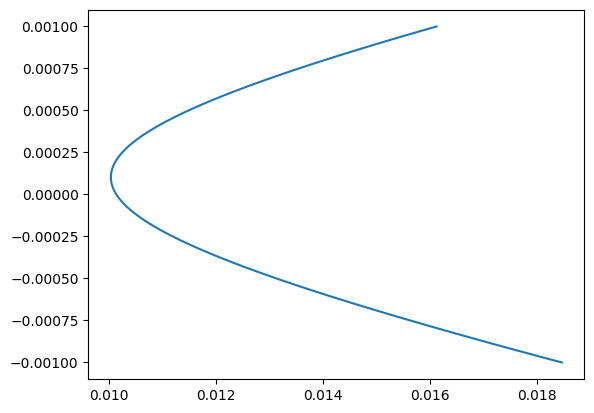

In [17]:
m = returns.mean()
sigma = returns.cov()
# plot efficient frontier
means = np.linspace(-0.001, 0.001, 100)
stdevs = np.vectorize(lambda mu: min_var_portfolio(m, sigma, mu)[2])(means)
plt.plot(stdevs, means)
plt.show()